## Project: 
Predicting Heart Disease with Classification Machine Learning Algorithms

Table of Contents
1. Introduction:
    Scenario
    Goal
    Features & Predictor

2. Data Wrangling

3. Exploratory Data Analysis:
    Correlations
    Violin & Box Plots
    Filtering data by positive & negative Heart Disease patient
    
4. Machine Learning + Predictive Analytics:
    Prepare Data for Modeling
    Modeling/Training
    Making the Confusion Matrix
    Feature Importance
    Predictions
    
5. Conclusions

### 1. Introduction

##### Scenario:
You have just been hired at a Hospital with an alarming number of patients coming in reporting various cardiac symptoms. A cardioligist measures vitals & hands you this data to peform Data Analysis and predict whether certain patients have Heart Disease.

##### Goal:

- To predict whether a patient should be diagnosed with Heart Disease. This is a binary outcome. 
Positive (+) = 1, patient diagnosed with Heart Disease  
Negative (-) = 0, patient not diagnosed with Heart Disease 

- To experiment with various Classification Models & see which yields  greatest accuracy. 
- Examine trends & correlations within our data
- determine which features are important in determing Positive/Negative Heart Disease

### Features & Predictor:

##### Our Predictor (Y, Positive or Negative diagnosis of Heart Disease) is determined by 13 features (X):

- age (#)
- sex : 1= Male, 0= Female (Binary)
- (cp)chest pain type (4 values -Ordinal):Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic 
- (trestbps) resting blood pressure (#)
- (chol) serum cholestoral in mg/dl (#)
- (fbs)fasting blood sugar > 120 mg/dl(Binary)(1 = true; 0 = false)
- (restecg) resting electrocardiographic results(values 0,1,2)
- (thalach) maximum heart rate achieved (#)
- (exang) exercise induced angina (binary) (1 = yes; 0 = no)
- (oldpeak) = ST depression induced by exercise relative to rest (#)
- (slope) of the peak exercise ST segment (Ordinal) (Value 1: upsloping , Value 2: flat , Value 3: downsloping )
- (ca) number of major vessels (0-3, Ordinal) colored by fluoroscopy
- (thal) maximum heart rate achieved - (Ordinal): 3 = normal; 6 = fixed defect; 7 = reversable defect

In [2]:
### Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

# LOADING DATA

In [2]:
### Import data set
df = pd.read_csv("heart.csv")
print(df.head(5))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


# Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
## know The number of rows and columns and column heading
print("(Rows, columns): " + str(df.shape))
print(df.columns)

(Rows, columns): (303, 14)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [7]:
df.nunique(axis=0) # returns the number of unique values for each variable.

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
#summarizes the count, mean, standard deviation, min, and max for numeric variables.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Display the Missing Values
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
print(df['target'].value_counts()) #To know propotion b/w positive and negative result

1    165
0    138
Name: target, dtype: int64


### Correlation
#### To see whether something is positivly or negativly correlated with our predictor (target)

<AxesSubplot:>

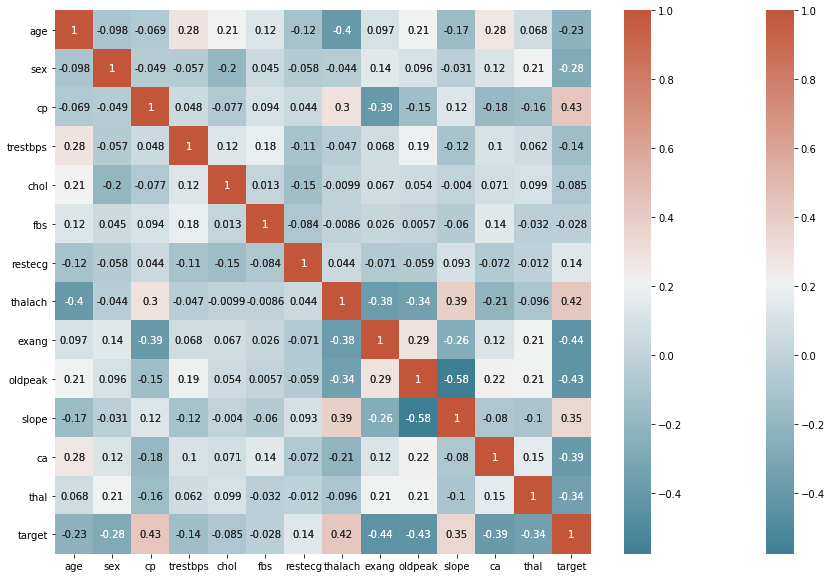

In [8]:
# calculate correlation matrix

corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

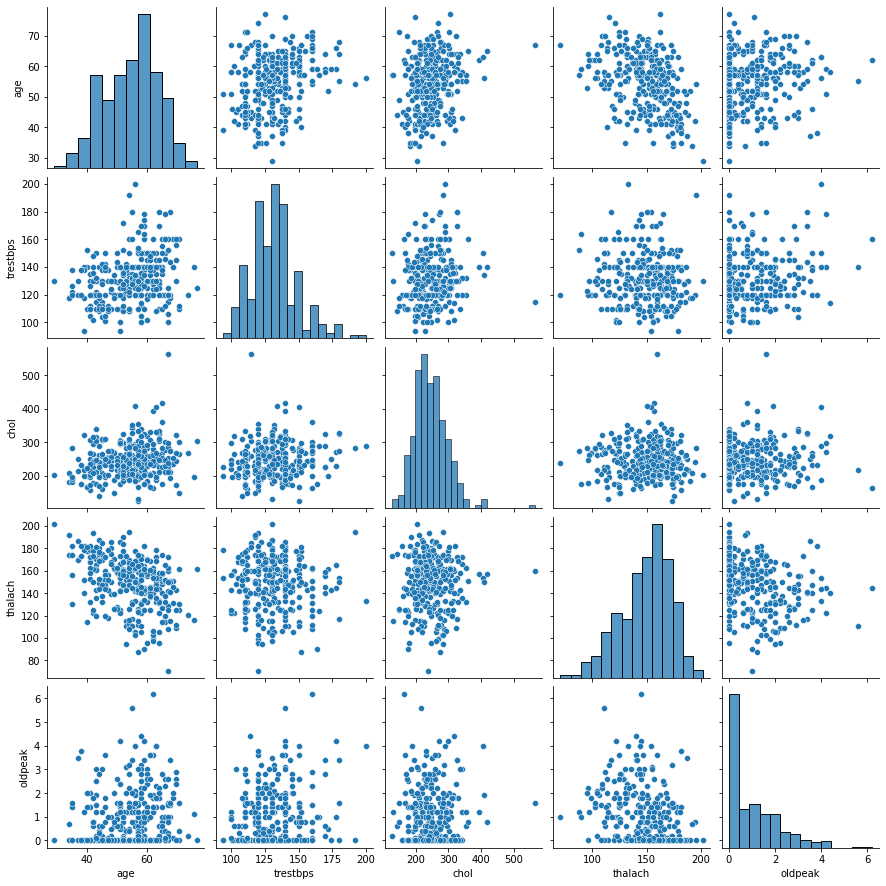

In [9]:
# PairPlotting
subData = df[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subData)

Text(10.778541666666662, 0.5, 'ST depression')

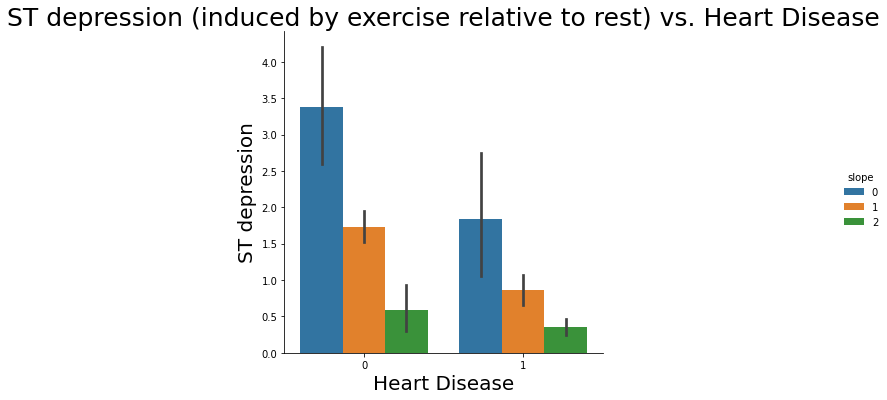

In [10]:
# Catplot
sns.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=df);
plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

# Bar plot for Count of male and female having heart disease

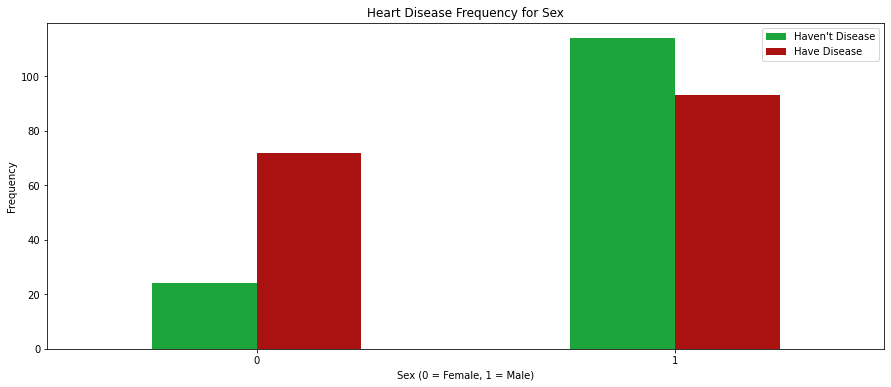

In [16]:


pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

# Scatter plot between Age and Maximum heart rate.

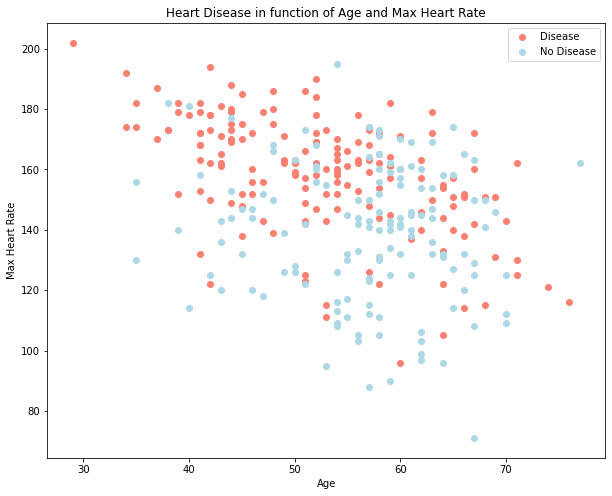

In [17]:
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

### Filtering data by positive & negative Heart Disease patient

In [11]:
# Filtering data by positive Heart Disease patient 
pos_data = df[df['target']==1]
pos_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [12]:
# Filtering data by negative Heart Disease patient 
neg_data = df[df['target']==0]
neg_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


### Machine Learning and Predictive Analysis

In [13]:
# Prepare data for modeling
# assigning first 13 values as input and last column as output 
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [15]:
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =.26 , random_state = 0) 

### Modeling/Training

### SVM

0.8481012658227848


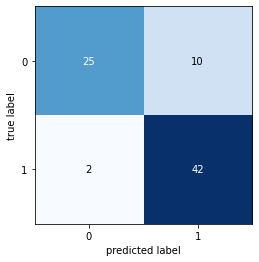

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix
from mlxtend.plotting import plot_decision_regions,plot_confusion_matrix
from sklearn.svm import SVC

model1 = SVC(kernel="linear", random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
acc = accuracy_score(y_test, y_pred1)
cm = confusion_matrix(y_test, y_pred1)
print(acc) # output accuracy
plot_confusion_matrix(cm) # confusion matrix
plt.show()

### K-NN

0.7341772151898734


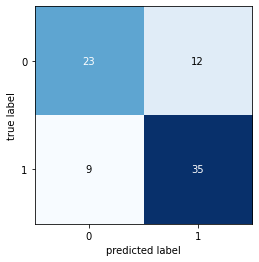

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix
from mlxtend.plotting import plot_decision_regions,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=7,metric="minkowski",p=1) # get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
acc = accuracy_score(y_test, y_pred2)
cm = confusion_matrix(y_test, y_pred2)
print(acc) # output accuracy
plot_confusion_matrix(cm) # confusion matrix
plt.show()


##### applying pca
- normalize/standardize


Normalize: Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1.

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [34]:
data = pd.read_csv("heart.csv")
print(data.head(5))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(x)
x_pca = pca.transform(x)
print(x_pca.shape)

(303, 2)


In [37]:
exp_var = pca.explained_variance_ratio_
print(exp_var)

[0.21254053 0.11820708]


In [38]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.2,random_state=0)

## Svm with PCA

0.8688524590163934


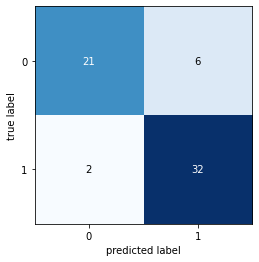

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix
from mlxtend.plotting import plot_decision_regions,plot_confusion_matrix
from sklearn.svm import SVC

model3 = SVC(kernel="rbf", random_state=1) # get instance of model
model3.fit(x_tr, y_tr) # Train/Fit model 

y_pred3 = model3.predict(x_te) # get y predictions
accuracy = accuracy_score(y_te, y_pred3)
cm3 = confusion_matrix(y_te, y_pred3)
print(accuracy) # output accuracy
plot_confusion_matrix(cm3) # confusion matrix
plt.show()

## KNN  with PCA

0.819672131147541


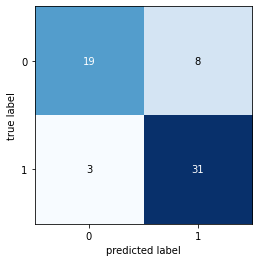

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix
from mlxtend.plotting import plot_decision_regions,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

model4 = KNeighborsClassifier(n_neighbors=7,metric="minkowski",p=1) # get instance of model
model4.fit(x_tr, y_tr) # Train/Fit model 

y_pred4 = model4.predict(x_te) # get y predictions
accr = accuracy_score(y_te, y_pred4)
cm4 = confusion_matrix(y_te, y_pred4)
print(accr) # output accuracy
plot_confusion_matrix(cm4) # confusion matrix
plt.show()